In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV, JSON file I/O (e.g. pd.read_csv)


from matplotlib import pyplot as plt

In [2]:
fake = pd.read_csv('../Fake.csv')
real = pd.read_csv('../True.csv')

print("fake luzeera")
print(len(fake))
print("real luzeera")
print(len(real))

fake luzeera
23481
real luzeera
21417


In [3]:
fake['label'] = 0
real['label'] = 1

In [4]:
hasiera_data = real.append(fake)

labelak = hasiera_data['label']

hasiera_data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


# Testua garbitu

In [6]:
import re

# Remove punctuation
hasiera_data['text_processed'] = \
hasiera_data['text'].map(lambda x: re.sub('[,\.!?()\']', '', x))

# Convert the titles to lowercase
hasiera_data['text_processed'] = \
hasiera_data['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
hasiera_data.head()

,title,text,subject,date,label,text_processed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters - the head of a conservativ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters - transgender people will b...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters - the special counsel inves...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters - trump campaign adviser ge...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattle/washington reuters - president donald ...


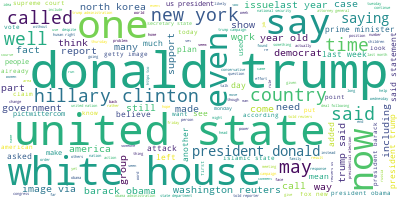

In [29]:
from wordcloud import WordCloud # hitzen kontaketa egiteko(pip install wordcloud)

# Join the different processed titles together.
long_string = ','.join(list(hasiera_data['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

stop_words = stopwords.words('english')

def sent_to_words(sentences):
  for sentence in sentences:
  # deacc=True removes punctuations
    yield(simple_preprocess(str(sentence), deacc=True))
    
def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = hasiera_data.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

[nltk_data] Downloading package stopwords to /home/duxon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/duxon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# countvectorizer erabiliko da hitzak tokenizatzeko eta TF-IDF 

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from decimal import Decimal


train_tamaina = Decimal('0.75')

emaitza=[]
ehuneko=[]

for x in range(9):
  X_train, X_test, y_train, y_test = train_test_split(hasiera_data, labelak, train_size=float(train_tamaina), test_size=0.25, random_state=3)

  text_clf = Pipeline([
                     ('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
  ])
  text_clf = text_clf.fit(X_train.text_processed, y_train)

  predicted = text_clf.predict(X_test.text_processed)
  a = np.mean(predicted == y_test)
  print('accuracy:' + str(train_tamaina) + ' erabilia trainean, lortutako emaitza ' + str(a))

  ehuneko.append(float(train_tamaina))
  emaitza.append(a)

  train_tamaina = train_tamaina - Decimal('0.05 ')


data = {
    'emaitza':emaitza,
    'erabilitako ehuneko':ehuneko
}


accuracy:0.75 erabilia trainean, lortutako emaitza 0.9374610244988865
accuracy:0.70 erabilia trainean, lortutako emaitza 0.9371937639198218
accuracy:0.65 erabilia trainean, lortutako emaitza 0.9370155902004454
accuracy:0.60 erabilia trainean, lortutako emaitza 0.93728285077951
accuracy:0.55 erabilia trainean, lortutako emaitza 0.9358574610244988
accuracy:0.50 erabilia trainean, lortutako emaitza 0.9363028953229399
accuracy:0.45 erabilia trainean, lortutako emaitza 0.9349665924276169
accuracy:0.40 erabilia trainean, lortutako emaitza 0.9346993318485524
accuracy:0.35 erabilia trainean, lortutako emaitza 0.9348775055679287


# klasifikazio algoritmoak

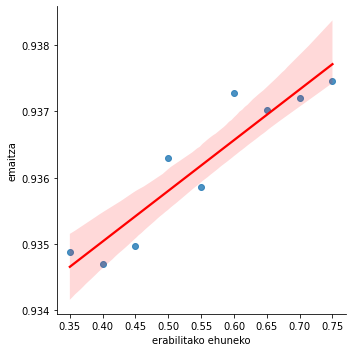

In [9]:
import seaborn as sns

df = pd.DataFrame(data)


sns.lmplot(
    data=df,
    x='erabilitako ehuneko', y='emaitza',
    line_kws={'color': 'red'}
)